# Effect of Trip Characteristics on Duration
## by Nicholas Lucasti

## Investigation Overview

In this investigation, I wanted to look at how the characteristics of a bike trip could be used to predict their durations. My main focuses were the distance, user type, day of the trip, and finally, user gender.

## Dataset Overview

The data consisted of approximately 210,000 bike trips from August 2019. All of the data points were used in this analysis, despite there being some outliers. 

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import geodesic
from datetime import date
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
ford = pd.read_csv('ford_updated.csv')

## Distribution of Trip Durations

Bike trips in the dataset take on a huge range of durations, from 0 seconds all the way to 85,000 seconds. I ignored values above 5,000 seconds because they were rarities in the data set. Plotten on a log scale, the distribution is normal in shape.

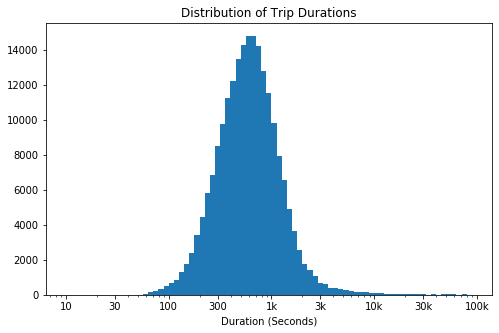

In [4]:
#Log Normalize Right skewed data
log_binsize = 0.05
bins = 10 ** np.arange(1, np.log10(ford.duration_sec.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000], ['10', '30', '100', '300', '1k', '3k', '10k', '30k', '100k'])
plt.xlabel('Duration (Seconds)')
plt.title('Distribution of Trip Durations')
plt.show()

## Distribution of Trip Distances

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

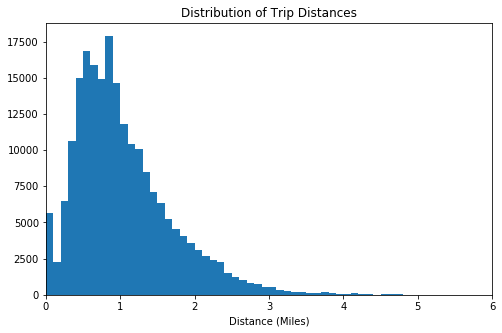

In [7]:
# start with a standard-scaled plot
binsize = 0.1
bins = np.arange(0, ford.distance.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'distance', bins = bins)
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (Miles)')
plt.xlim([0,6])
plt.show()

## Trip Durations Across Gender and Day

We can see that gender and day of the week have a huge effect on trip duration. It is clear that females take longer trips than men, while also traveling further distances. 

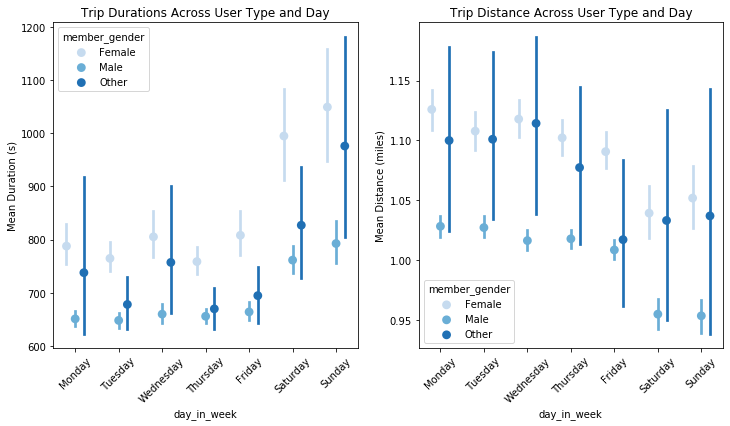

<Figure size 576x432 with 0 Axes>

In [9]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])


fig = plt.figure(figsize = [8,6])
chart1= sb.pointplot(data = ford, x = 'day_in_week', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0],
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[0].set_title('Trip Durations Across User Type and Day')
ax[0].set_ylabel('Mean Duration (s)')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xticklabels(chart1.get_xticklabels(),rotation = 45)

chart2 = sb.pointplot(data = ford, x = 'day_in_week', y = 'distance', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1],
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[1].set_title('Trip Distance Across User Type and Day')
ax[1].set_ylabel('Mean Distance (miles)')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(chart2.get_xticklabels(),rotation = 45)

plt.show();



## Trip Durations Across User Type and Day

Reproducting similar plots for different user types. We find an even more striking relation. Customers are taking trips that are longer in both duration and distance especially on the weekend. I found that subscribers travel roughly the same duration throughout the week, with a small dip in distance on the weekend. 

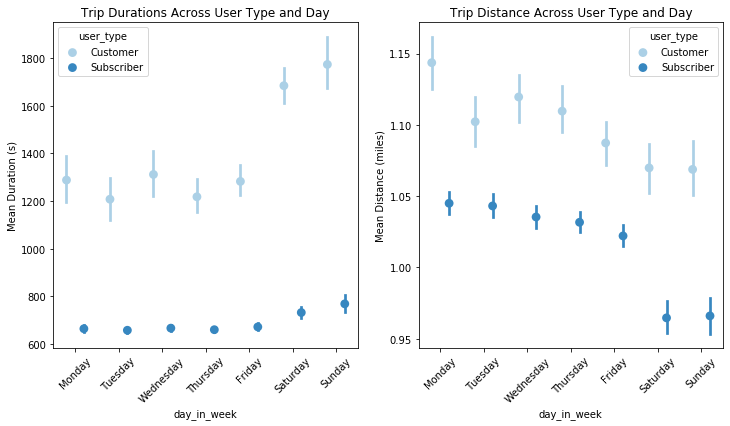

<Figure size 576x432 with 0 Axes>

In [10]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])


fig = plt.figure(figsize = [8,6])
chart1= sb.pointplot(data = ford, x = 'day_in_week', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0],
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[0].set_title('Trip Durations Across User Type and Day')
ax[0].set_ylabel('Mean Duration (s)')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xticklabels(chart1.get_xticklabels(),rotation = 45)

chart2 = sb.pointplot(data = ford, x = 'day_in_week', y = 'distance', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1],
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[1].set_title('Trip Distance Across User Type and Day')
ax[1].set_ylabel('Mean Distance (miles)')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(chart2.get_xticklabels(),rotation = 45)

plt.show();
